## Exercise 9 - Solution

In [10]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.figsize"] = [15,4]

In [15]:
# Load sales data
sales = pd.read_csv('data/rossmann/sales.csv', parse_dates=['Date'])
#sales_open = sales.query('Open==1')
sales_open = sales
sales_open.sample(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
329702,910,2,2014-09-23,3976,477,1,0,0,0
230956,152,1,2015-01-05,8585,801,1,1,0,1
445182,1083,4,2014-05-29,0,0,0,0,a,0
70996,752,5,2015-05-29,5014,458,1,0,0,0
658561,382,1,2013-11-18,13478,918,1,1,0,0
615676,982,5,2013-12-27,8586,851,1,0,0,1
492308,264,3,2014-04-16,9119,1176,1,1,0,1
951184,875,5,2013-03-01,5920,533,1,0,0,0
146334,270,7,2015-03-22,0,0,0,0,0,0
176716,547,1,2015-02-23,5437,416,1,0,0,0


### How is Sales related to the number of Customers

m=7.417061572866309, c=1077.736503184817


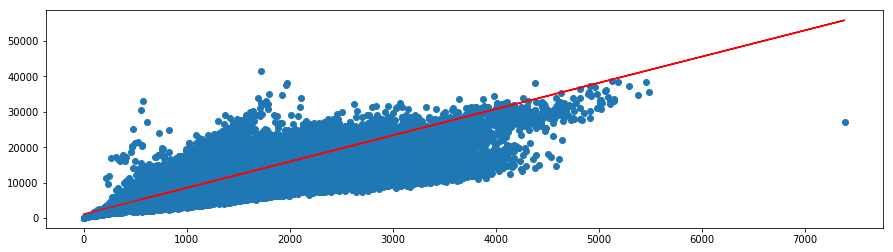

In [16]:
# Find out how sales are related to the number of customers, using numpy.linalg.lstsq()
x = sales_open['Customers']
y = sales_open['Sales']
a = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(a, y, rcond=None)[0]
print(f'm={m}, c={c}')

plt.scatter(x, y);
plt.plot(x, m*x + c, 'r');

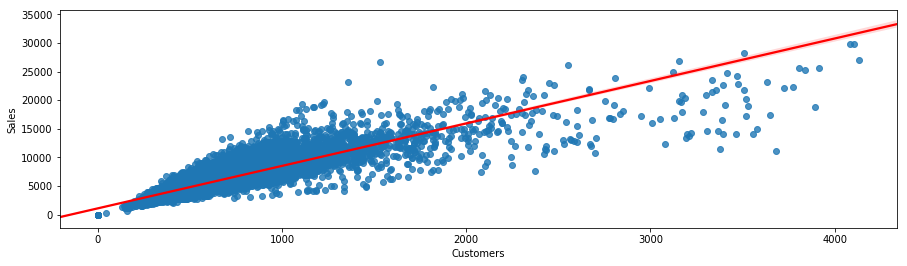

In [17]:
# Find out how sales are related to the number of customers, using Seaborn regplot
# Note: Seaboarn calculates the confidence interval which is quite expensive. For large datasets:
# (1) work with a sample, or 
# (2) disable calculation of confidence interval `ci=None', or
# (3) reduce the number of bootstrap resamples `n_boot=10
sales_open_sample = sales_open.sample(10000)
sns.regplot('Customers', 'Sales', data=sales_open_sample, line_kws={'color':'r'});

### How is tip related to the total bill amount?

In [21]:
# Load the tips example data set
tips = sns.load_dataset('tips')
tips.sample(10)

,total_bill,tip,sex,smoker,day,time,size
68,20.23,2.01,Male,No,Sat,Dinner,2
126,8.52,1.48,Male,No,Thur,Lunch,2
139,13.16,2.75,Female,No,Thur,Lunch,2
102,44.30,2.50,Female,Yes,Sat,Dinner,3
66,16.45,2.47,Female,No,Sat,Dinner,2
222,8.58,1.92,Male,Yes,Fri,Lunch,1
67,3.07,1.00,Female,Yes,Sat,Dinner,1
167,31.71,4.50,Male,No,Sun,Dinner,4
101,15.38,3.00,Female,Yes,Fri,Dinner,2
201,12.74,2.01,Female,Yes,Thur,Lunch,2


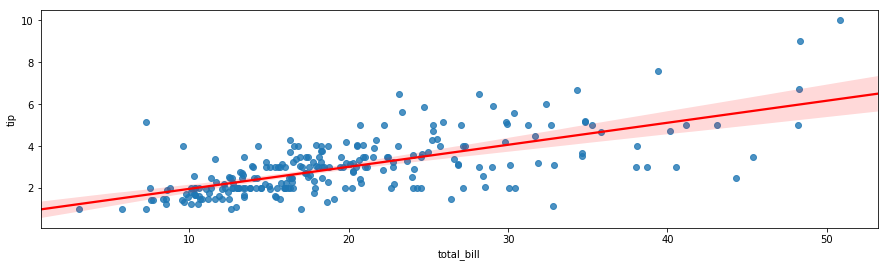

In [22]:
# Find out how the tip is related to the total bill amount
sns.regplot('total_bill', 'tip', data=tips, ci=95, line_kws={'color':'r'});